- References
1. https://www.youtube.com/watch?v=pMCqD9WSYwQ&feature=youtu.be&ab_channel=Dr.KittyYeung
2. https://www.youtube.com/watch?v=HAV17aVqufQ&ab_channel=AnantVigyan
3. https://hackaday.io/project/168554/files
4. https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm
5. https://www.youtube.com/watch?v=fbntwz3RlbU&ab_channel=QuantumComputing

<h1 align="center">
<span style="color: blue;">$\textbf{Quantum Oracles}$</center>
</h1>

<span style="color: blue;">Quantum Oracle is a black box used extensively in quantum algorithms for
the estimation of functions using qubits. Estimation in a classical computer is set up with an $n$ -dimensional input $x$ producing an $m$ -dimensional output $f(x)$

$$
f:\{0,1\}^{n} \rightarrow\{0,1\}^{m}
$$

The $n$ -dimensional vector $x$ is encoded as quantum information by
considering $n$ qubits each storing a single bit of information as below

$$
|x\rangle=\left|x_{0}\right\rangle \otimes\left|x_{1}\right\rangle \otimes \cdots \otimes\left|x_{n-1}\right\rangle
$$

Quantum oracles help transform a system from a quantum state $|x\rangle$ into a state $|f(x)\rangle,$ through the evolution of quantum states.

<img src="Images/Oracle.jpg" alt="drawing" width="600"/>


<h1 align="center">
<span style="color: red;">$\textbf{Deutsch-Jozsa Algorithm}$</center>
</h1>

<span style="color: blue;">Deutsch’s algorithm was the first to demonstrate a clear advantage of quantum over classical computing.Deutsch-Jozsa algorithm is the $n$ qubit version of the Deutsch algorithm.The functions now take $n$ bit strings (e.g. "0101011") as an input and return one bit output ($0$ or $1$). Bob still is allowed only to use either balanced or constant functions and Alice should find out the property of that function.

Let's begin with an example. Suppose I buy two standard decks of 52 playing cards. In a separate room where you cannot see me, I create a single deck of 52 cards where one of the following is true:
1. All the cards are red or all the cards are black.
2. Half the cards (26) are black and half are red.

<span style="color: red;">The first option is called "constant" and the second is "balanced."

<img src="Images/function.jpeg" alt="drawing" width="600"/>

I now go to you and give you the problem of finding out which of the two possibilities is the case for the deck I am holding. You do so by looking at and then discarding the card at the top of the deck.

In the best case, the first card is one color and the second is the other. Therefore the deck is balanced. In the worst case you must examine $27=1+52 / 2$ cards. The first 26 cards might be black, say. If the next is black, then all are black. If it is red, the deck is balanced.

Regarding an oracle, we are asking "is the card at the top of the deck black?". It returns 1 if it is, 0 if it is red. As I stated, we must consult the oracle 27 times in the worst case to get the
correct answer.

<img src="Images/deutsch_steps.png" alt="drawing" width="900"/>

The main steps of the algorithm are presented in the following circuit:
1. The algorithm begins with the $n+1$ bit state $|0\rangle^{\otimes n}|1\rangle.$ That is, the first n bits are each in the state $|0\rangle$ and the final bit is $|1\rangle .$ A Hadamard transform is applied to each bit to obtain the state

$$
\left| \psi_1 \right\rangle =\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^{n}-1}|x\rangle(|0\rangle-|1\rangle)
$$

2. We have the function $f$ implemented as a quantum oracle. The oracle maps the state $|x\rangle|y\rangle$ to $|x\rangle|y \oplus f(x)\rangle,$ where $\oplus$ is addition modulo 2. Applying the quantum oracle gives

$$
\left| \psi_2 \right\rangle =
\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^{n}-1}|x\rangle(|f(x)\rangle-|1 \oplus f(x)\rangle)
$$

- For each $x, f(x)$ is either 0 or 1 . Testing these two possibilities, we see the above state is equate

$$
\left| \psi_2 \right\rangle =
\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}|x\rangle(|0\rangle-|1\rangle)
$$

- At this point the last qubit $\frac{|0\rangle-|1\rangle}{\sqrt{2}}$ may be ignored and therefore below is remained:

$$
\frac{1}{\sqrt{2^{n}}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}|x\rangle
$$

3. We apply a Hadamard transform to each qubit to obtain

$$
\left| \psi_3 \right\rangle =
\frac{1}{\sqrt{2^{n}}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}\left[\frac{1}{\sqrt{2^{n}}} \sum_{y=0}^{2^{n}-1}(-1)^{x \cdot y}|y\rangle\right]=\frac{1}{2^{n}} \sum_{y=0}^{2^{n}-1}\left[\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}(-1)^{x \cdot y}\right]|y\rangle
$$

where $x \cdot y=x_{0} y_{0} \oplus x_{1} y_{1} \oplus \cdots \oplus x_{n-1} y_{n-1}$ is the sum of the bitwise product.
4. Finally we examine the probability of measuring $|0\rangle^{\otimes n}$

$$
\left|\frac{1}{2^{n}} \sum_{x=0}^{2^{n}-1}(-1)^{f(x)}\right|^{2}
$$

which evaluates to 1 if $f(x)$ is constant (constructive interference) and 0 if $f(x)$ is balanced (destructive interference). In other words, the final measurement will be $|0\rangle^{\otimes n}$ (i.e. all zeros) if $f(x)$ is constant and will yield some other states if $f(x)$ is balanced.

### Why Does This Work? <a id='why-does-this-work'> </a>
- **Constant Oracle**

When the oracle is *constant*, it has no effect (up to a global phase) on the input qubits, and the quantum states before and after querying the oracle are the same. Since the H-gate is its own inverse, in Step 4 we reverse Step 2 to obtain the initial quantum state of $|00\dots 0\rangle$ in the first register.

$$
H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\quad \xrightarrow{\text{after } U_f} \quad
H^{\otimes n}\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
= 
\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
$$

- **Balanced Oracle**

After step 2, our input register is an equal superposition of all the states in the computational basis. When the oracle is *balanced*, phase kickback adds a negative phase to exactly half these states:

$$
U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
$$


The quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, in Step 4, when applying the H-gates, we must end up with a quantum state that is orthogonal to $|00\dots 0\rangle$. This means we should never measure the all-zero state.

<img src="Images/overall dj.jpg" alt="drawing" width="600"/>

In [11]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size="small", case="balanced")

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x00\xcc\x08\x06\x00\x00\x00;\xd7\x9c…

## 2. Qiskit Implementation <a id='implementation'></a>

We now implement the Deutsch-Jozsa algorithm for the example of a three-bit function, with both constant and balanced oracles. First let's do our imports:

In [2]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

### 2.1 Constant Oracle <a id='const_oracle'></a>
Let's start by creating a constant oracle, in this case the input has no effect on the output so we just randomly set the output qubit to be 0 or 1:

In [12]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

### 2.2 Balanced Oracle <a id='balanced_oracle'></a>

In [13]:
balanced_oracle = QuantumCircuit(n+1)

Next, we create a balanced oracle. As we saw in section 1b, we can create a balanced oracle by performing CNOTs with each input qubit as a control and the output bit as the target. We can vary the input states that give 0 or 1 by wrapping some of the controls in X-gates. Let's first choose a binary string of length `n` that dictates which controls to wrap:

In [14]:
b_str = "101"

Now we have this string, we can use it as a key to place our X-gates. For each qubit in our circuit, we place an X-gate if the corresponding digit in `b_str` is `1`, or do nothing if the digit is `0`.

In [15]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

Next, we do our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target:

In [16]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

Finally, we repeat the code from two cells up to finish wrapping the controls in X-gates:

In [17]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

We have just created a balanced oracle! All that's left to do is see if the Deutsch-Jozsa algorithm can solve it.

### 2.3 The Full Algorithm <a id='full_alg'></a>

Let's now put everything together. This first step in the algorithm is to initialize the input qubits in the state $|{+}\rangle$ and the output qubit in the state $|{-}\rangle$:

In [18]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

Next, let's apply the oracle. Here we apply the `balanced_oracle` we created above:

In [19]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw()

<ipython-input-19-0228702ca776>:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle
C:\Users\User\anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

Finally, we perform H-gates on the $n$-input qubits, and measure our input register:

In [20]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

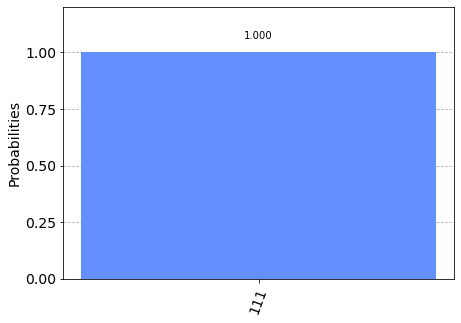

In [21]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

We can see from the results above that we have a 0% chance of measuring `000`. This correctly predicts the function is balanced. 

### 2.4 Generalised Circuits <a id='general_circs'></a>

Below, we provide a generalised function that creates Deutsch-Jozsa oracles and turns them into quantum gates. It takes the `case`, (either `'balanced'` or '`constant`', and `n`, the size of the input register:

In [22]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [45]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)    
    
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

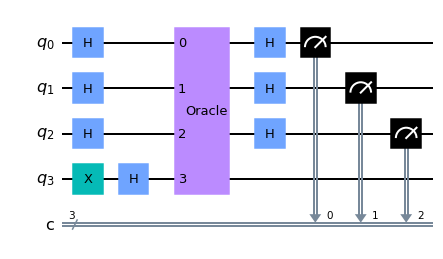

In [46]:
n = 3
oracle_gate = dj_oracle('constant', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw("mpl")

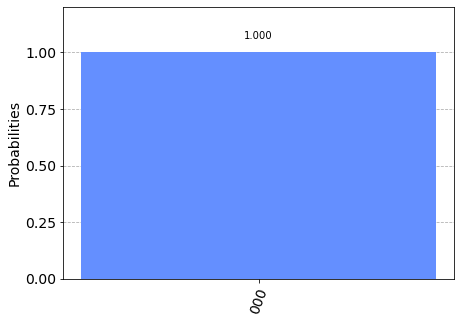

In [47]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [48]:
import qiskit.tools.jupyter
%qiskit_version_table

C:\Users\User\anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
